<a href="https://colab.research.google.com/github/krtkshrvstv/PCA/blob/main/CSPCAmodellive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

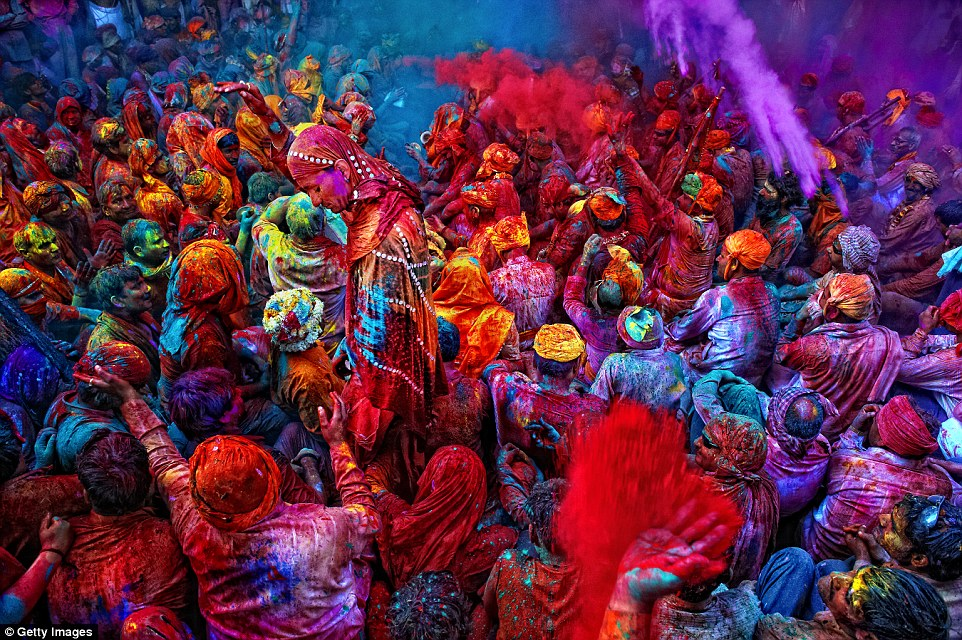



Dispalying colour image of the scene


LinAlgError: ignored

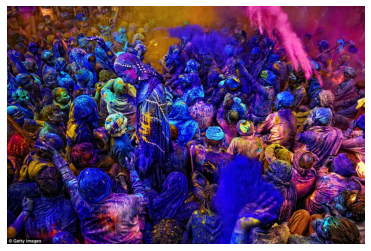

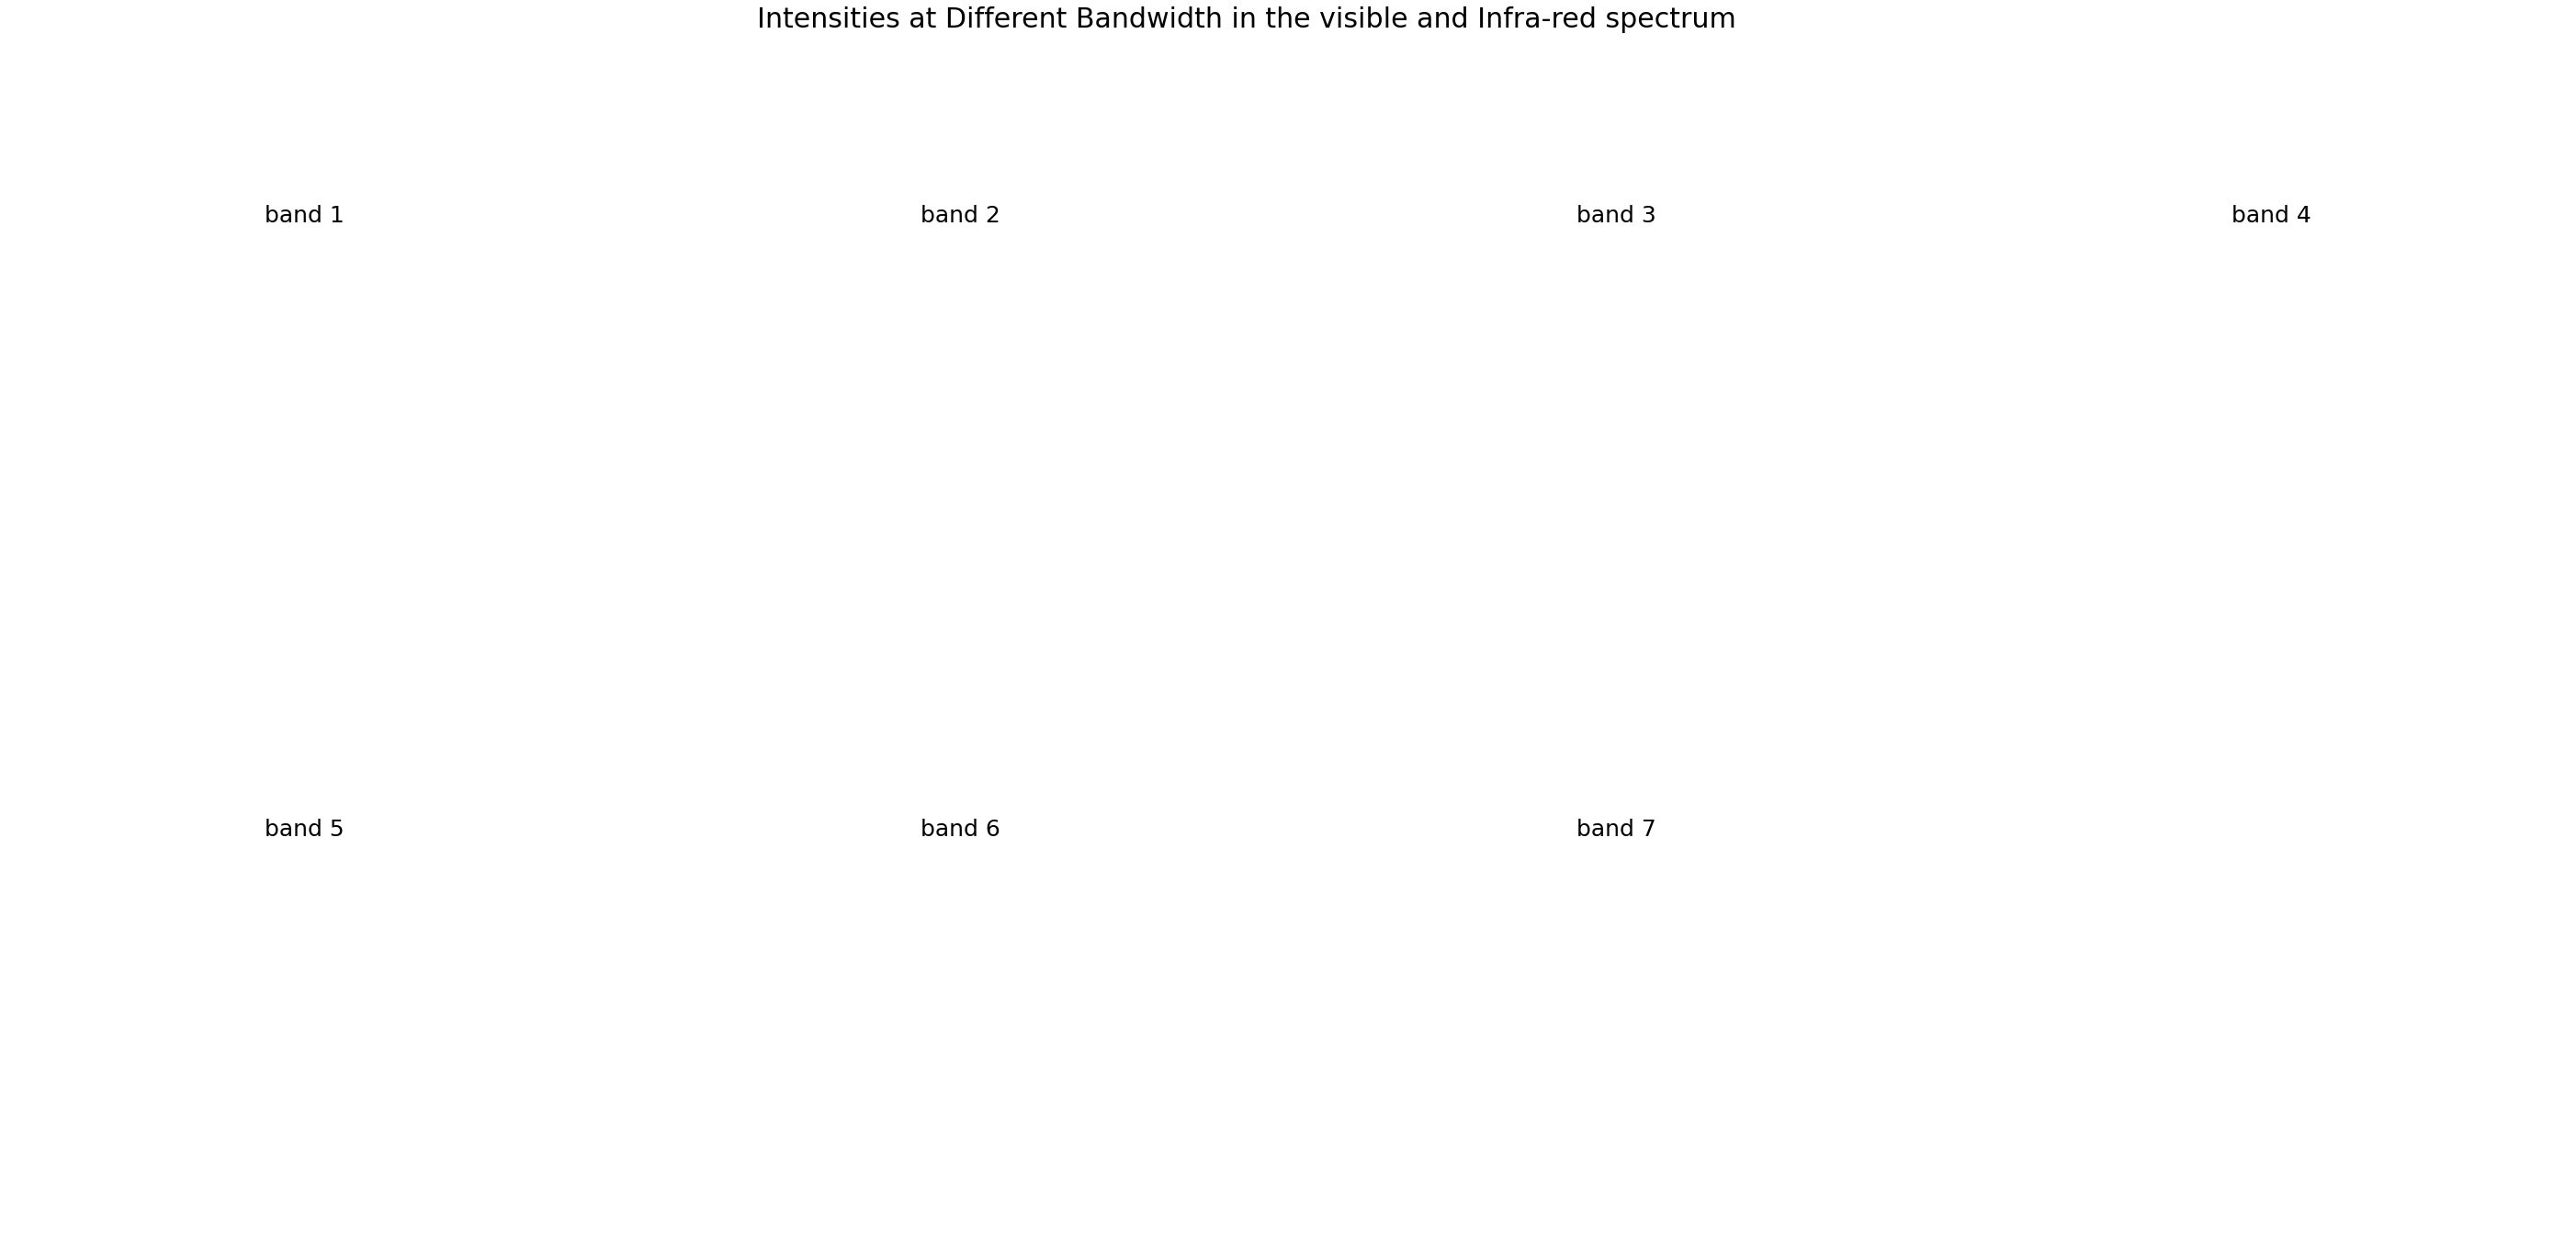

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import pandas as pd
import seaborn as sns
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow

# You can give path to the 
# image as first argument 
img = cv2.imread('cc.jpg', 0) 

# will show the image in a window 
img = cv2.imread("/colour.jpg") 
k = cv2.waitKey(0) & 0xFF
cv2_imshow(img)
img_shape = img.shape[:2]

# wait for ESC key to exit 
if k == 27: 
	cv2.destroyAllWindows() 
	
# wait for 's' key to save and exit 
elif k == ord('s'): 
	cv2.imwrite('messigray.png',img) 
	cv2.destroyAllWindows() 


# specify no of bands in the image
n_bands = 7

# 3 dimensional dummy array with zeros
MB_img = np.zeros((img_shape[0],img_shape[1],n_bands))

# stacking up images into the array
for i in range(n_bands):
    MB_img[:,:,i] = cv2.imread('band'+str(i+1)+'.jpg', cv2.IMREAD_GRAYSCALE)  

# Let's take a look at scene
print('\n\nDispalying colour image of the scene')
plt.figure(figsize=(img_shape[0]/100,img_shape[1]/100))
plt.imshow(img, vmin=0, vmax=255)
plt.axis('off');
 

fig,axes = plt.subplots(2,4,figsize=(50,23),sharex='all', sharey='all')
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Intensities at Different Bandwidth in the visible and Infra-red spectrum', fontsize=30)
axes = axes.ravel()

for i in range(n_bands):
    axes[i].imshow(MB_img[:,:,i],cmap='gray', vmin=0, vmax=255)
    axes[i].set_title('band '+str(i+1),fontsize=25)
    axes[i].axis('off')
fig.delaxes(axes[-1])

# Convert 2d band array in 1-d to make them as feature vectors and Standardization
MB_matrix = np.zeros((MB_img[:,:,0].size,n_bands))

for i in range(n_bands):
    MB_array = MB_img[:,:,i].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd
MB_matrix.shape;

# Covariance
np.set_printoptions(precision=3)
cov = np.cov(MB_matrix.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

print("Eigenvalues:\n\n", EigVal,"\n")

# Ordering Eigen values and vectors
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(MB_matrix,EigVec)   #cross product

# Generate Paiplot for original data and transformed PCs

Bandnames = ['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7']
a = sns.pairplot(pd.DataFrame(MB_matrix, columns = Bandnames),
                 diag_kind='kde',plot_kws={"s": 3})
a.fig.suptitle("Pair plot of Band images")

PCnames = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6','PC 7']
b = sns.pairplot(pd.DataFrame(PC, columns = PCnames),
                 diag_kind='kde',plot_kws={"s": 3})
b.fig.suptitle("Pair plot of PCs")

#Information Retained by Principal Components

plt.figure(figsize=(8,6))
plt.bar([1,2,3,4,5,6,7],EigVal/sum(EigVal)*100,align='center',width=0.4,
        tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
plt.ylabel('Variance (%)')
plt.title('Information retention');

fig,axes = plt.subplots(2,4,figsize=(50,23),sharex='all', sharey='all')
fig.subplots_adjust(wspace=0.1, hspace=0.15)
fig.suptitle('Intensities of Principal Components ', fontsize=30)

axes = axes.ravel()
for i in range(n_bands):
    axes[i].imshow(PC_2d_Norm[:,:,i],cmap='gray', vmin=0, vmax=255)
    axes[i].set_title('PC '+str(i+1),fontsize=25)
    axes[i].axis('off')
fig.delaxes(axes[-1])

# Comparsion of RGB and Image produced using first three bands
fig,axes = plt.subplots(1,2,figsize=(50,23),
                        sharex='all', sharey='all')   
fig.subplots_adjust(wspace=0.1, hspace=0.15)

axes[0].imshow(MB_img[:,:,0:3].astype(int))
axes[0].axis('off');

axes[1].imshow(PC_2d_Norm[:,:,:3][:,:,[0,2,1]].astype(int))
axes[1].axis('off');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
Pass@90%


ValueError: ignored